In [1]:
# Task 1: Sentiment Analysis on IMDB Reviews using Different RNN Architectures

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, GRU

# Load IMDB dataset
vocab_size = 10000  # Top 10,000 words
maxlen = 200  # Max review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define model builder function
def build_model(rnn_layer):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=maxlen),
        rnn_layer,
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 1. Simple RNN
simple_rnn_model = build_model(SimpleRNN(64)) # 64 meansa >> 64 nodes
simple_rnn_model.summary()
simple_rnn_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# 2. LSTM
lstm_model = build_model(LSTM(64))
lstm_model.summary()
lstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)

# 3. Bidirectional LSTM
bilstm_model = build_model(Bidirectional(LSTM(64)))
bilstm_model.summary()
bilstm_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# 4. Stacked LSTM
stacked_lstm_model = Sequential([
    Embedding(vocab_size, 64, input_length=maxlen),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
stacked_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
stacked_lstm_model.summary()
stacked_lstm_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# 5. GRU
gru_model = build_model(GRU(64))
gru_model.summary()
gru_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# Evaluate all models
def evaluate_model(model, name):
    loss, acc = model.evaluate(x_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}, Loss: {loss:.4f}")

evaluate_model(simple_rnn_model, "Simple RNN")
evaluate_model(lstm_model, "LSTM")
evaluate_model(bilstm_model, "Bidirectional LSTM")
evaluate_model(stacked_lstm_model, "Stacked LSTM")
evaluate_model(gru_model, "GRU")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5972 - loss: 0.6430 - val_accuracy: 0.8142 - val_loss: 0.4205


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6888 - loss: 0.5761 - val_accuracy: 0.8636 - val_loss: 0.3289
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8985 - loss: 0.2581 - val_accuracy: 0.8728 - val_loss: 0.3241
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9255 - loss: 0.2032 - val_accuracy: 0.8738 - val_loss: 0.3108


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6343 - loss: 0.6150 - val_accuracy: 0.8562 - val_loss: 0.3484


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6911 - loss: 0.5576 - val_accuracy: 0.8680 - val_loss: 0.3253


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6176 - loss: 0.6326 - val_accuracy: 0.8230 - val_loss: 0.3988
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8238 - loss: 0.4120
Simple RNN Accuracy: 0.8273, Loss: 0.4071
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8684 - loss: 0.3263
LSTM Accuracy: 0.8690, Loss: 0.3246
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8544 - loss: 0.3480
Bidirectional LSTM Accuracy: 0.8566, Loss: 0.3450
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8672 - loss: 0.3271
Stacked LSTM Accuracy: 0.8664, Loss: 0.3290
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8247 - loss: 0.3923
GRU Accuracy: 0.8270, Loss: 0.3871


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5750 - loss: 0.6654 - val_accuracy: 0.7758 - val_loss: 0.4801
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8451 - loss: 0.3607 - val_accuracy: 0.8324 - val_loss: 0.3921
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9187 - loss: 0.2146 - val_accuracy: 0.8186 - val_loss: 0.4353


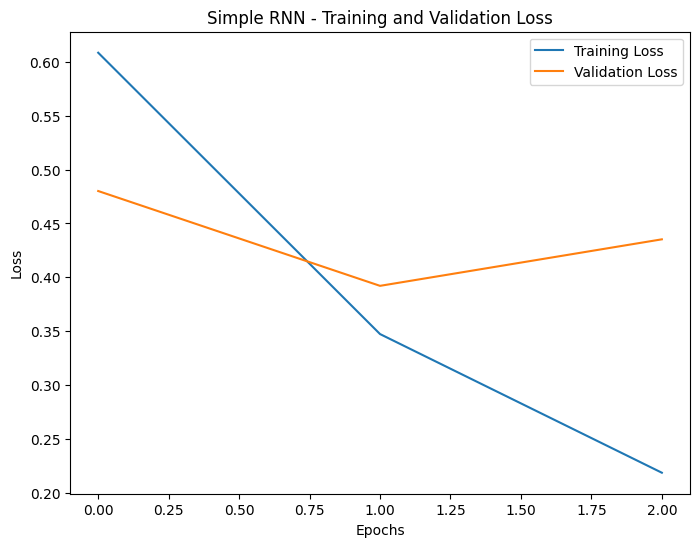

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6546 - loss: 0.5972 - val_accuracy: 0.8620 - val_loss: 0.3347
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8958 - loss: 0.2613 - val_accuracy: 0.8698 - val_loss: 0.3460
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9288 - loss: 0.1901 - val_accuracy: 0.8740 - val_loss: 0.3117


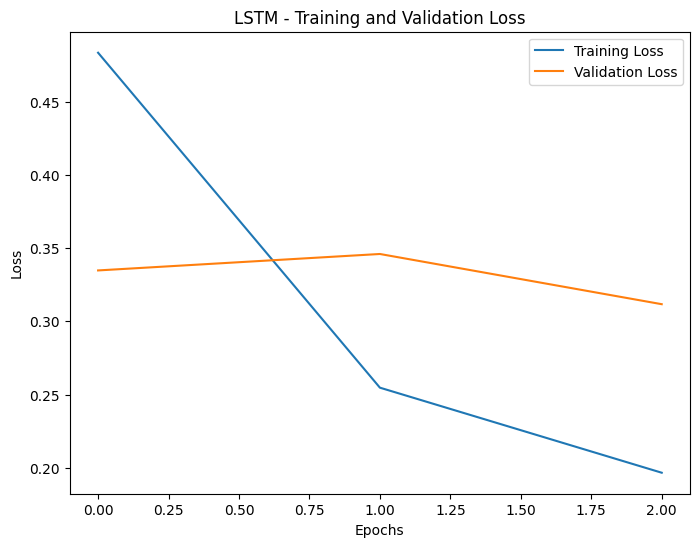

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6428 - loss: 0.6233 - val_accuracy: 0.8602 - val_loss: 0.3333
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8947 - loss: 0.2702 - val_accuracy: 0.8718 - val_loss: 0.3181
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9322 - loss: 0.1917 - val_accuracy: 0.8682 - val_loss: 0.3172


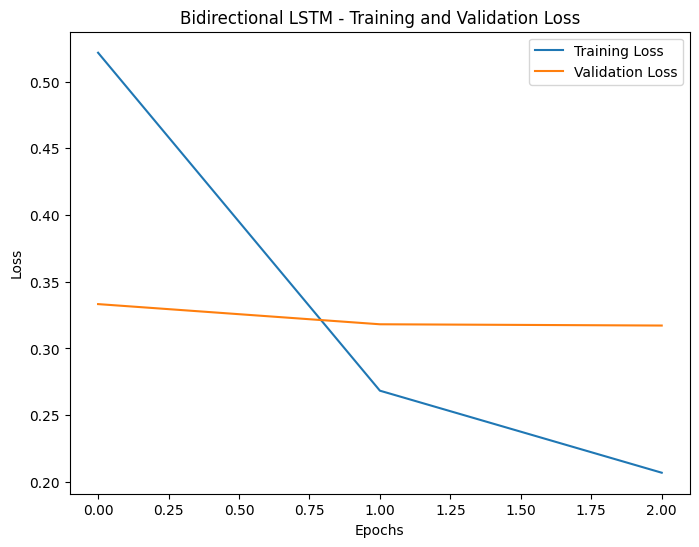

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6690 - loss: 0.5829 - val_accuracy: 0.8326 - val_loss: 0.4177
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8744 - loss: 0.3190 - val_accuracy: 0.8748 - val_loss: 0.3252
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9257 - loss: 0.2037 - val_accuracy: 0.8482 - val_loss: 0.3568


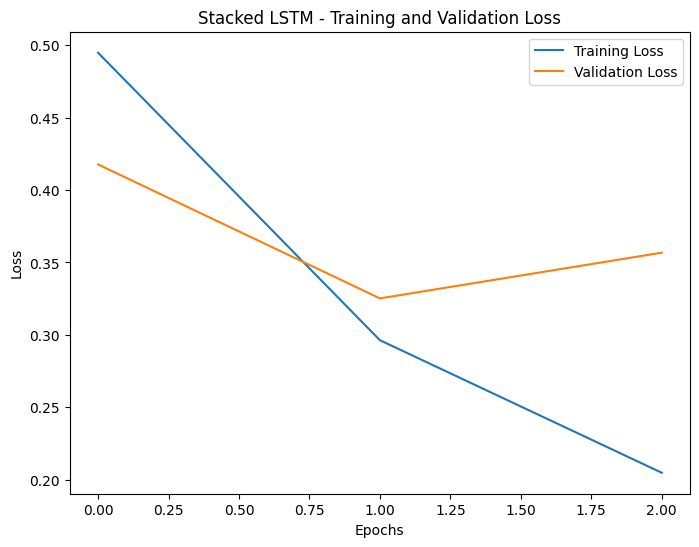

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6113 - loss: 0.6426 - val_accuracy: 0.8148 - val_loss: 0.4214
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8630 - loss: 0.3162 - val_accuracy: 0.8666 - val_loss: 0.3192
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9203 - loss: 0.2029 - val_accuracy: 0.8676 - val_loss: 0.3616


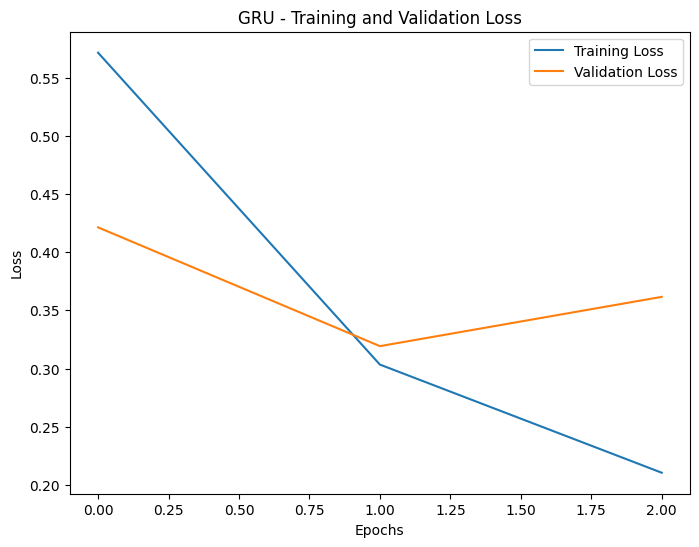

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8146 - loss: 0.4289
Simple RNN Accuracy: 0.8188, Loss: 0.4233
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8678 - loss: 0.3307
LSTM Accuracy: 0.8670, Loss: 0.3314
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8625 - loss: 0.3301
Bidirectional LSTM Accuracy: 0.8642, Loss: 0.3273
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8456 - loss: 0.3687
Stacked LSTM Accuracy: 0.8469, Loss: 0.3638
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8550 - loss: 0.3804
GRU Accuracy: 0.8553, Loss: 0.3810

Predictions on New Text:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
Simple RNN: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
LSTM: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Bidirectional LSTM: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Stacked LSTM: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
GRU: Positive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Load IMDB dataset
vocab_size = 10000  # Top 10,000 words
maxlen = 200  # Max review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Initialize tokenizer and fit on training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([i for i in imdb.get_word_index().keys()])  # Fit tokenizer on IMDB dataset

# Define model builder function
def build_model(rnn_layer):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=maxlen),
        rnn_layer,
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to plot training and validation loss
def plot_loss(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to make predictions on new text
def predict_new_text(model, text, tokenizer, maxlen=200):
    # Preprocess text: Tokenize and pad the sequence
    tokenized_text = tokenizer.texts_to_sequences([text])  # Tokenize the new text
    if not tokenized_text[0]:  # Check if the text is empty after tokenization
        return "Invalid input text."
    padded_text = pad_sequences(tokenized_text, maxlen=maxlen, padding='post')  # Pad the sequence
    prediction = model.predict(padded_text)  # Get prediction
    return "Positive" if prediction >= 0.5 else "Negative"

# 1. Simple RNN
simple_rnn_model = build_model(SimpleRNN(64))
simple_rnn_history = simple_rnn_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(simple_rnn_history, "Simple RNN")

# 2. LSTM
lstm_model = build_model(LSTM(64))
lstm_history = lstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(lstm_history, "LSTM")

# 3. Bidirectional LSTM
bilstm_model = build_model(Bidirectional(LSTM(64)))
bilstm_history = bilstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(bilstm_history, "Bidirectional LSTM")

# 4. Stacked LSTM
stacked_lstm_model = Sequential([
    Embedding(vocab_size, 64, input_length=maxlen),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
stacked_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
stacked_lstm_history = stacked_lstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(stacked_lstm_history, "Stacked LSTM")

# 5. GRU
gru_model = build_model(GRU(64))
gru_history = gru_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(gru_history, "GRU")

# Evaluate all models
def evaluate_model(model, name):
    loss, acc = model.evaluate(x_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}, Loss: {loss:.4f}")

evaluate_model(simple_rnn_model, "Simple RNN")
evaluate_model(lstm_model, "LSTM")
evaluate_model(bilstm_model, "Bidirectional LSTM")
evaluate_model(stacked_lstm_model, "Stacked LSTM")
evaluate_model(gru_model, "GRU")

# Predict on new text using all models
new_text = "I loved the movie, it was fantastic and thrilling!"

print("\nPredictions on New Text:")
print(f"Simple RNN: {predict_new_text(simple_rnn_model, new_text, tokenizer)}")
print(f"LSTM: {predict_new_text(lstm_model, new_text, tokenizer)}")
print(f"Bidirectional LSTM: {predict_new_text(bilstm_model, new_text, tokenizer)}")
print(f"Stacked LSTM: {predict_new_text(stacked_lstm_model, new_text, tokenizer)}")
print(f"GRU: {predict_new_text(gru_model, new_text, tokenizer)}")

In [ ]:
# ab es me kuch bhi change krna ghai to change kijiye epoch size and nodes pr experiments kijiyer batch_sizepr